# Axel Alejandro Tlatoa Villavicencio - A01363351
# Ciencia y analítica de datos

#Desarrollo de Modelo

Un **modelo** se puede pensar como una ecuación matemática que se usa comúnmente para predecir un valor dado uno o más valores. Relacionando uno o más variables independientes o características a variables dependientes. Usualmente entre más datos relevantes se tienen más preciso es el modelo. 

# Regresión lineal simple y múltiple

La **regresión lineal simple** o (*SLR*) es un método que permite conocer la relaciín entre dos variables: la predictora (independiente) $x$, y la variable objetivo (dependiente) $y$. Se busca entonces encontrar una relación lineal entre las dos variables que se mencionan. El parámetro $b_{0}$ es el *intercepto*, el parámetro $b_{1}$ representa la *pendiente*. Es posible determinar estos parámetros al ajustar o se entrenar el modelo.

$y = b_{0}+b_{1}x$

Para determinar la línea (en caso de ser lineal el problema) se toman distintos puntos del conjunto de datos y se entrenan para ajustar el modelo propuesto, los resultados de los puntos de entrenamiento son los parámetros. Se busca almacenar los puntos de datos en dos dataframe o arreglos numpy. Al valor que se busca predecir se le denomina el *objetivo* y usualmente se guarda en el arreglo $y$, la variable dependiente se guarda en el arreglo $x$. Cada muestra corresponde a renglones diferentes. 

$x = \begin{bmatrix} a \\ b \\ c\end{bmatrix}$ $y = \begin{bmatrix} n \\ m \\ p\end{bmatrix}$

En los modelos una pequeña incertidumbre se representa mediante valores aleatorios añadidos al punto en la línea, a esto se le conoce como ruido. Se representa mediante una distribución Gaussiana, para cada segmento en la recta que igual puede no caer dentro de la misma línea, sino por arriba o por debajo de la misma. Para hacer el ajuste en Python debemos importar la librería desde **scikit-learn** y crear un objeto de regresión lineal usando un constructor. Definir la variable predictora y la variable objetivo. 

In [2]:
from sklearn.linear_model import LinearRegression
# Crear un objeto de regresión lineal usando un constructor:
Reg_Lineal = LinearRegression()
# Se definen las variables predictoras y las objetivo:
# X = df[['algo']]
# Y = df[['algo']]
# Luego se usa el método fit para ajustar el modelo y definir los parámetros b0 y b1
# Reg_lineal.fit(X,Y)
# Así se obtiene una predicción mediante el método predict
# y_hat = Reg_Lineal.predict(X)

La salida es un arreglo con el mismo número de muestras que el de la variable de entrada $X$, el intercepto $b_{0}$ es un atributo del objeto Reg_Lineal al igual que $b_{1}$ 

La **regresión lineal múltiple** es utilizada para explicar la relación entre una variable objetivo ($Y$) contínua, y dos o más variables predictoras ($X$). Si se tienen 4 variables predictoras entonces:

$\hat{y} = b_{0}+b_{1}x_{1}+b_{2}x_{2}+b_{3}x_{3}+b_{4}x_{4}$

$b_{0}$ sigue siendo el intercepto, $b_{1}$ el coeficiente del parámetro 1 y así sucesivamente. 

In [3]:
# Se extraen las 4 variables predictoras y se guardan en la variable Z 
# z = df[['variable 1','variable 2', 'variable 3','variable 4']]
# Se entrena el modelo 
# Reg_lineal.fit(Z,df['variable objetivo'])
# Se predice
# y_hat = Reg_Lineal.predict(Z)

# Evaluación de modelos usando visualización

Los gráficos de regresión son útiles para estimar: 
* La relación entre dos variables.
* La fuerza de correlación. 
* La dirección de la relación (positiva o negativa).

El eje horizonal representa la variable independiente (la abscisa), el eje vertical reprsenta a la variable dependiente (ordenada al origen). Hay distintas formas de trazar un gráfico de regresión en python, la manera más simple es mediante *regplot* de la librería de seaborn. 

In [4]:
import seaborn as sns

#sns.regplot(x = 'variable predictora', y = 'variable objetivo', data =df)
#plt.ylim(0,)

$x$ contiene el nombre de la columna que contiene a la variable independiente, $y$ contiene el nombre de la columna que contiene a la variable dependiente u objetivo, el parámetro data es el nombre del conjunto de datos. 

Si se examina el valor de la predicción contra el valor actual se puede obtener una diferencia y dicho valor se grafica nuevamente en el eje vertical junto con la variable dependiente como eje horizontal. 

$\hat{y}-y_{0}$

Uno esperaría ver que los resultados tengan una media cero, es decir, que estén distribuidos de manera uniforme alrededor del eje $x$ con varianza similar, sin curvatura, este tipo de gráfico residual sugiere que un trazo lineal es apropiado. Para crear una gráfica residual se utiliza la librería seaborn y la función *residplot*.

In [5]:
# sns.residplot(df['variable dependiente', 'variable dependiente u objetivo'])

Un gráfico de distribución cuenta el valor de la predicción vs el valor actual. Este tipo de gráficos son útiles para visualizar modelos con más de una variable independiente o característica. 

In [6]:
# ax1 = sns.displot(df['var1'],hist = False, color = 'r', label='valor actual')
# sns.displot(Yhat, hist = False, color = 'b', label = 'Valores ajustados', ax = ax1)

# Evaluación numérica

Estás mediciones son una forma para determinar numéricamente que tan bien se ajuta el modelo a nuestros datos. Las métricas más comúnmente utilizadas son: 
1. MSE (Error cuadrático medio)
2. $R^{2}$: R- cuadrado. 

El MSE se define como la diferencia entre el valor actual y el valor de la predicción $\hat{y}$ elevados a la segunda potencia y dividido entre el número de muestras.

$MSE = \frac{1}{n} ∑_{i=1}^{n} (y_{i}-\hat{y_{i}})^{2}$

Para hacer uso de está métrica que necesita importar a nuestro espacio la librería de scikit-learn.metrics:

In [7]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(df['variable'], Y_predict_simple_fit)

La función tiene dos entradas: el valor actual de la variable objetivo y la variable de predicción de dicho objetivo. 

R-cuadrado, es también denominado como coeficiente de determinación y es una métrica que censa que tan cercanos son los valores del conjunto de datos a los valores del ajuste de la regresión lineal, es decir, que tan pegados están los datos actuales con el modelo de predicción. 

$R^{2} = \bigg( 1 - \frac{MSE_{\ de \ la \ linea \ de \ regresion}}{MSE_{\ del \ promedio \ de \ los \ datos}} \bigg)$ 

o

$R^{2} = \frac{ ∑_{i=1}^{n} (\hat{y_{i}}-\bar{y})^{2}}{∑_{i=1}^{n} (y_{i}-\bar{y})^{2}}$

Los valores que tienden a cero son indicadores de un ajuste relativamente bueno, ya que al ser un valor del cociente de los dos MSE's que se aproxima a 0 o un número muy pequeño a la hora de operar la diferencia el valor final $≈ 1$. Por ende es un modelo que tiene un buen ajuste. Caso contrario, cuado el cociente tiende → 1 entonces la diferencia $≈ 0$, entonces la línea propuesta tendrá casi el mismo desempeño que usar la media del conjunto de datos, por lo tanto, no es un buen ajuste. Para usar el R-cuadrado en Python se utiliza el método *score*.

In [8]:
#Reg_Lineal.score(x,y)

# Predicción y Decisiones

Para conocer el coeficiente de una predicción se utiliza el método: *.coef_*. En algunas ocaciones el modelo producirá valores que no hagan sentido. 

Para eso hay que acotar las predicciones a espacios dónde sí tengan sentido. Para generar una secuencia de valores en un rango específico se importa la librería de numpy, y se utiliza la función *arrange*:


In [9]:
import numpy as np
# Utilizamos la función de numpu arrange para generar una secuencia de 1 a 100:
nueva_entrada = np.arange(1,101,1).reshape(-1,1)
# empieza en el 1 y termina en N+1, y los pasos de 1.


In [10]:
# usamos una salida para predecir nuevos valores; la salida es un arreglo de numpy
# yhat = Reg_Lineal.predict(nueva_entrada)

Un valor aceptable para $R^2$ depende del campo que se esté estudiando. Algunos autores sugieren que un valor debe ser igual o superior a 0.10.

Al comparar RLM y RLS: ¿Un MSE más bajo siempre implica un mejor ajuste?, No necesariamente. El MSE para un modelo RLM será más pequeño que el MSE para un modelo RLS, ya que los errores de los datos disminuirán cuando se incluyan más variables en el modelo. La regresión polinomial también tendrá un MSE más pequeño que la regresión regular. Una relación inversa similar se mantiene para $R^2$.

# Laboratorio

In [11]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [12]:
# Leemos los archivos de entrada en un dataframe
import pandas as pd
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Regresión lineal simple: la variable predictora $x$ y la variable objetivo $y$, así que creamos un objeto con la regresión lineal:

In [13]:
Reg_Lineal = LinearRegression()

¿Cómo la variable millas de carretera por galón nos puede ayudar a predecir el precio del coche?

In [14]:
X = df[['highway-mpg']] # Se crea otro dataframe únicamente con la característica mcpg
Y = df['price']

In [15]:
X.head()

,highway-mpg
0,27
1,27
2,26
3,30
4,22


In [16]:
Reg_Lineal.fit(X,Y)

LinearRegression()

In [17]:
Yhat=Reg_Lineal.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
Reg_Lineal.intercept_

38423.3058581574

In [19]:
Reg_Lineal.coef_

array([-821.73337832])

Por lo tanto el modelo nos queda como:

$Precio = 38423.31 - 821.73(millas \ de \ carretera \ por \ galon )$

*Preguntas*: QUIZ

In [20]:
lm1 = LinearRegression()

In [21]:
lm1.fit(df[['engine-size']],Y)

LinearRegression()

In [22]:
lm1.coef_

array([166.86001569])

In [23]:
lm1.intercept_

-7963.338906281042

Ecuación de predicción:

$Precio=-7963.34 + 166.86(Dimension \ de \ motor)$

In [24]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [26]:
Reg_Lineal.fit(Z, df['price'])

LinearRegression()

In [27]:
Reg_Lineal.intercept_

-15806.62462632922

In [28]:
Reg_Lineal.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Para la regresión lineal múltiple tenemos dadas las variables ya previstas el siguiente modelo:

$Precio = -15678.742628061467 + 52.65851272 \cdot x_{1} + 4.69878948 \cdot x_{2} + 81.95906216 \cdot x_{3} + 33.58258185 \cdot x_{4}$

Quiz 2

In [29]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

In [30]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [31]:
lm2.intercept_

38201.31327245728

In [34]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

(0.0, 48184.18126861617)

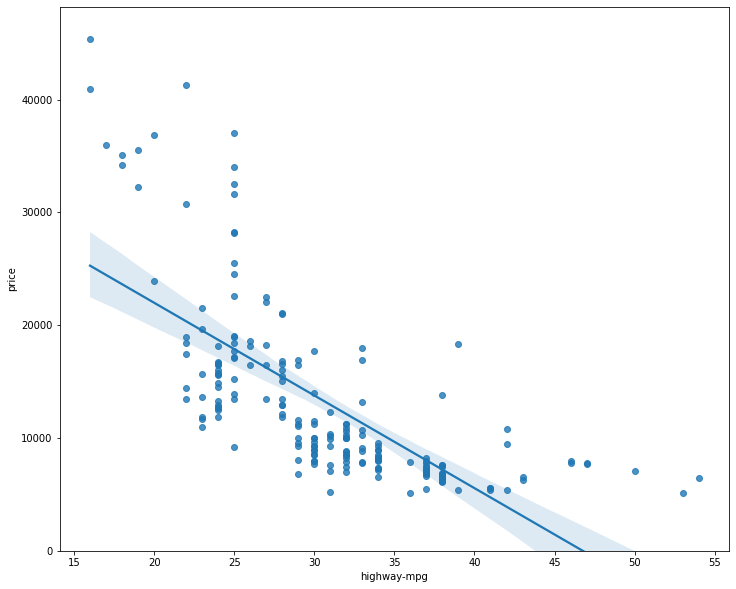

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

El precio está correlacionado de forma negativa con la variable de millas de carretera por galón. 

(0.0, 47414.1)

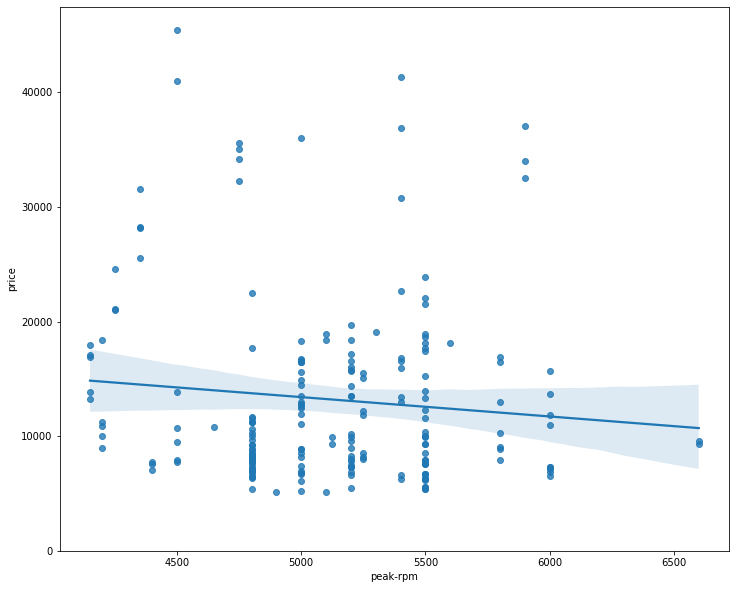

In [36]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar máximas revoluciones por minuto vs el precio vemos que no hay mucha correlación, puesto que la línea recta tiende a ser una constante (línea horizontal), también existe mucha dispersión en los datos como para realmente hallar o determinar una correlación. 

In [37]:
df[['peak-rpm','highway-mpg','price']].corr()*100 # Checando correlación entre las variables de manera porcentual %

,peak-rpm,highway-mpg,price
peak-rpm,100.000000,-5.859759,-10.161587
highway-mpg,-5.859759,100.000000,-70.469227
price,-10.161587,-70.469227,100.000000


Se puede apreciar que la correlación más alta es de tipo negativo y es entre el precio y las millas de carretera por galón que equivalen a un 70% de conexión entre ambas variables, mientras que las revoluciones por minuto máximas apenas predicen el 10% del precio. 

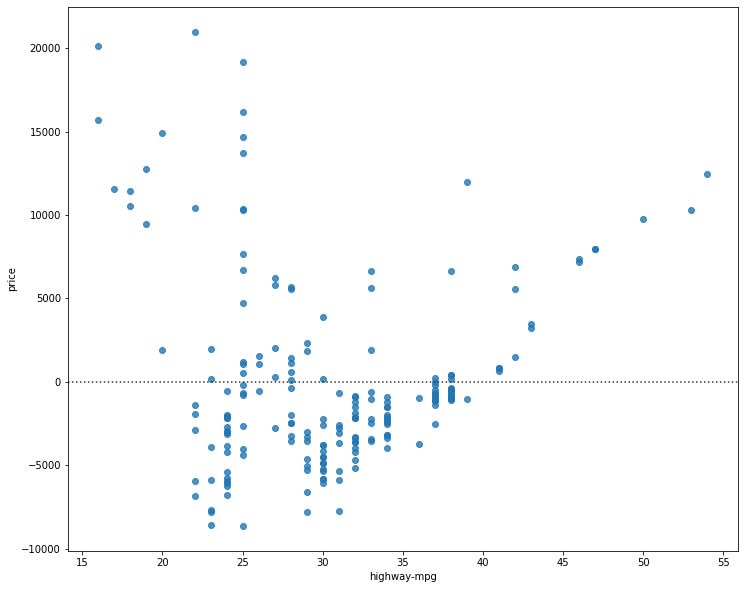

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

La gráfica de residuos muestra que los residuos no se distribuyen aleatoriamente alrededor del eje $x$, se concluye que es mejor implementar un modelo no lineal para estos datos.

Para realizar gráficos de regresiones lineales múltiples se debe de implementar un trazo de distribución puesto que al tener varias dimensiones es más complicado visualizar los datos. Se observa la distribución de los valores ajustados que resultan del modelo y se compara con la distribución de los valores reales.

In [40]:
Y_hat = Reg_Lineal.predict(Z)

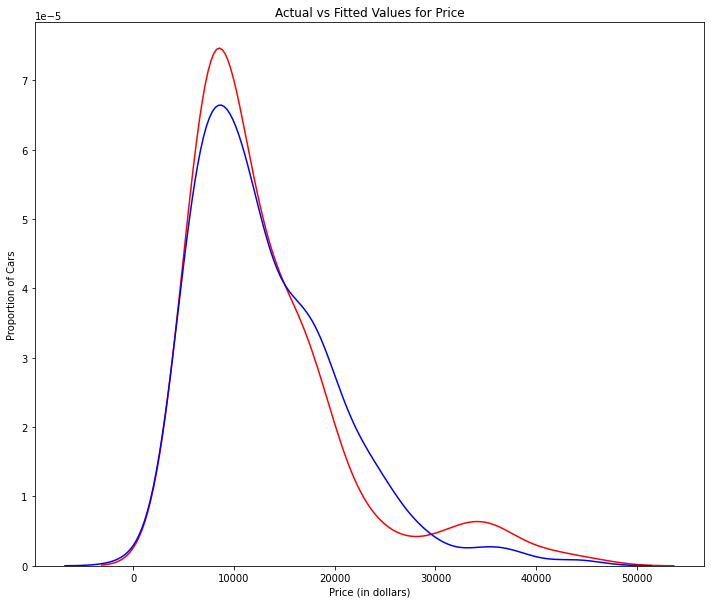

In [43]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Se puede analizar que la distribución del modelo predictivo casi se ajusta a la de los valores reales, entonces podemos confiar en la fiabilidad del modelo de predicción. 

In [52]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [53]:
x = df['highway-mpg']
y = df['price']

In [64]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


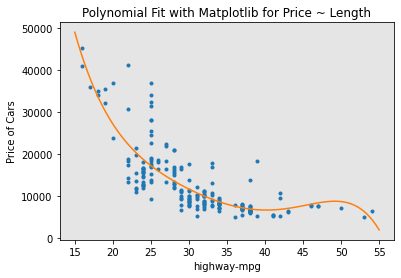

In [63]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


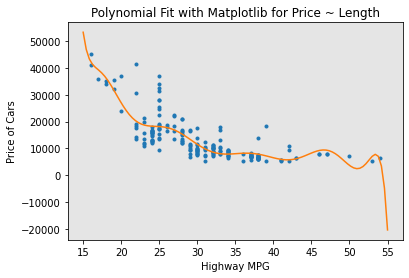

In [67]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [70]:
Z_pr=pr.fit_transform(Z)

In [71]:
Z.shape

(201, 4)

In [72]:
Z_pr.shape

(201, 15)

La Pipelines simplifican los pasos para procesar los datos. Se usa el módulo Pipeline para crear un pipeline. También StandardScaler como un paso en la canalización.

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [74]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
 # Se crea una lista de tuplas que incluyen el nombre del modelo y su constructor

Recordemos que la estandarización es análogo a la normalización de los datos para escalarlos y manejarlos.

$z = \frac{(x-\mu)}{\sigma}$

Las pipelines hacen una serie secuencial de transformaciones, el último hace la predicción. 

In [75]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [76]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [77]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [78]:
pip = Pipeline([('standardization', StandardScaler()),('LR',LinearRegression())])
pip.fit(Z,y)
ypip=pip.predict(Z)
ypip[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [81]:
Reg_Lineal.fit(X, Y)
#R^2
print('The R-square is: ', Reg_Lineal.score(X, Y))

The R-square is:  0.4965911884339176


In [82]:
Yhat=Reg_Lineal.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [85]:
Reg_Lineal.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', Reg_Lineal.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [86]:
Y_predict_multifit = Reg_Lineal.predict(Z)

In [87]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [88]:
from sklearn.metrics import r2_score

In [89]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [90]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [91]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [92]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [93]:
Reg_Lineal.fit(X, Y)
Reg_Lineal

LinearRegression()

In [94]:
yhat=Reg_Lineal.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

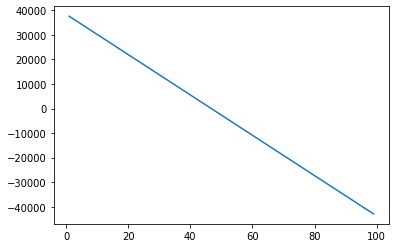

In [95]:
plt.plot(new_input, yhat)
plt.show()

#Evidencias

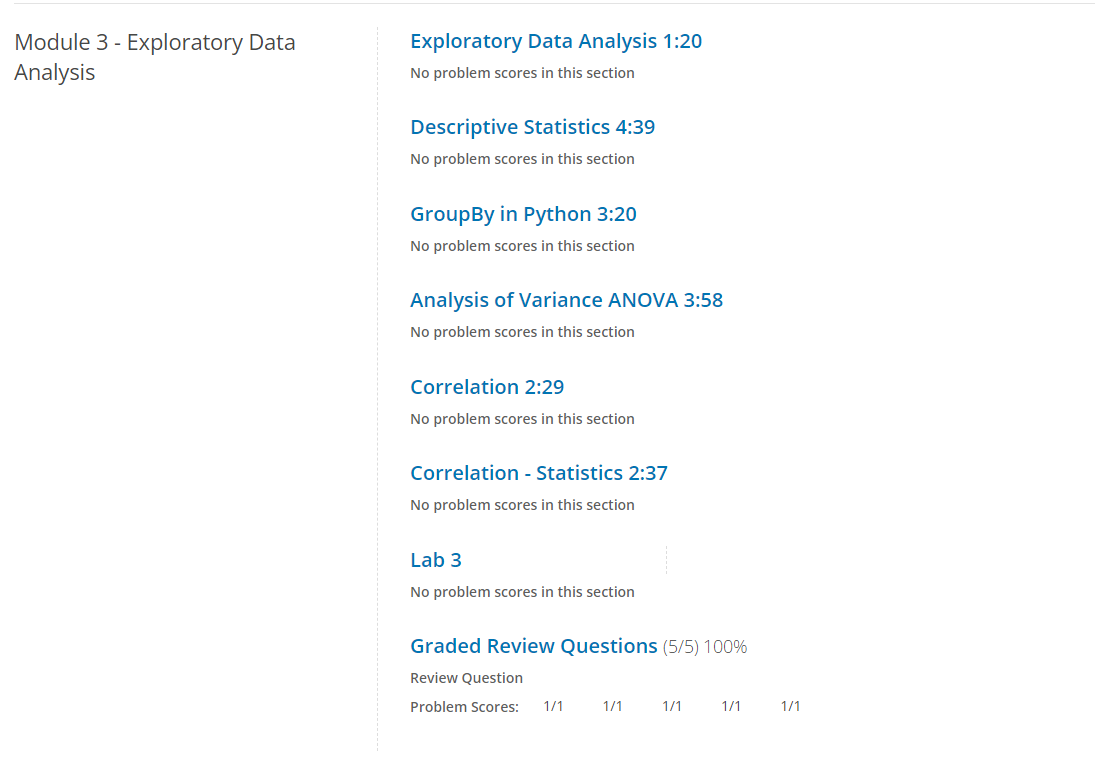

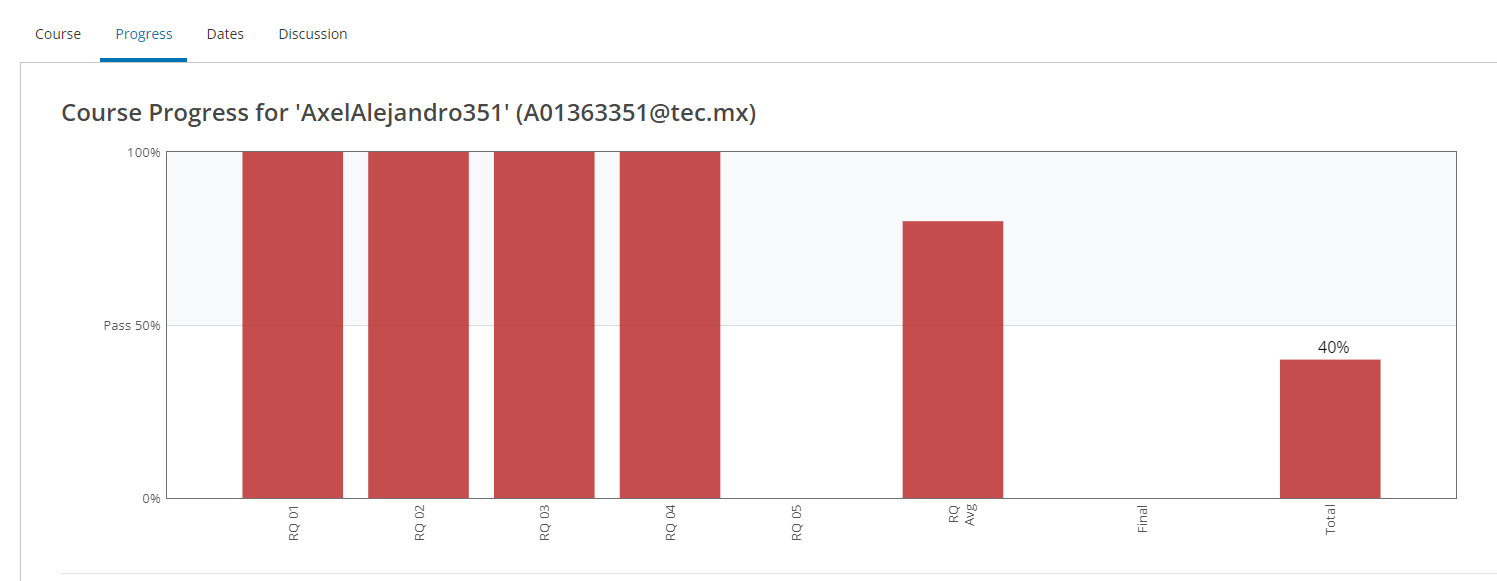